# Business Decision Research

## Case Study

DQLab sports center is a shop that sells various sports needs such as Jackets, Clothes, Bags, and Shoes. This shop started selling in 2013. In early 2019, there was something problem, customer churn.  The store manager defines that a customer was customer anymore  (churn) when they were not transacting to the store again up to 6 last months since available data update. The store manager also provides data transaction from 2013 to 2019 in CSV.

data display:

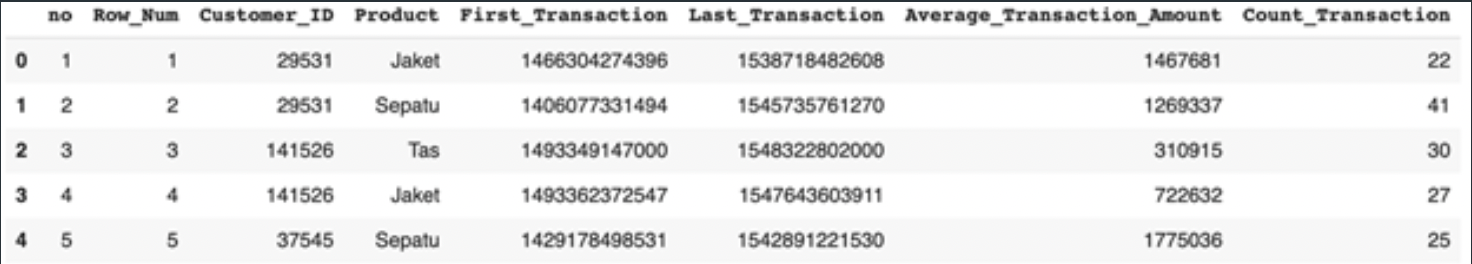

The fields in the data include:
1. No
2. Row_Num
3. Customer_ID
4. Product
5. First_Transaction
6. Last_Transaction
7. Average_Transaction_Amount
8. Count_Transaction

The three steps that must have done are:
1. Data preparation test
    - Importing data: imports data_retail.csv to python environtment
    - Cleansing data: Cleansing and modifying the data to be used for further analysis.
2. Data visualization test: Gain insight from the results of data visualization.
3. Basic stats method test: Gain insights from models and evaluate models.

## Data Preparation

### 1. Import Data and Inspection

Data dummy from retail company DQStore: https://storage.googleapis.com/dqlab-dataset/data_retail.csv

In [1]:
import pandas as pd

df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')

In [2]:
print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      ----

Dataset retail has 8 columns and 100,000 rows of data without NULL.

### 2. Data Cleansing

Two fields, First_Transaction and Last_Transaction are transaction data but the type of data is not DateTime. Data cleansing changes the two fields from int64 to DateTime.

In [3]:
# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.396000000   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999872   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999808   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608000000                     1467681                 22  
1 2018-12-25 11:02:41.269999872                     1269337                 41  
2 2019-01-24 09:40:02.000000000                      310915                 30  
3 2019-01-16 13:00:03.911000064                      722632                 27  
4 2018-11-22 12:53:41.529999872                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries,

From the output, the data types of the First_Transaction and Last_Transaction fields are already DateTime.

### 3. Customer Churn

a customer was a customer anymore (churn) when they were not transacting to the store again up to 6 last months since the available data update. To determine customer churn, the things that must be doing are:
1. Looking for the most recent transaction doing
2. Classifications customers with churn status or not churn

In [6]:
# Pengecekan Transaksi terakhir dalam dataset
print(max(df['Last_Transaction']))

2019-02-01 23:57:57.286000128


The last transaction in the dataset was 2019-02-01, so the customer is Churn if no longer doing transaction after 2018-08-01.

In [8]:
# Klasifikasikan customer yang berstatus churn atau tidak dengan boolean
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01','is_churn'] = False

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.396000000   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999872   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999808   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000000                     1467681   
1 2018-12-25 11:02:41.269999872                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000064                      722632   
4 2018-11-22 12:53:41.529999872                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False  
4                 25    Fal

### 4. Deleting Unnecessary Fields

to analyzing data, not all fields required. From 8 fields in the dataset, 2 fields will be deleted, fileds 'no' and the 'Row_Num'.

In [9]:
# Hapus kolom-kolom yang tidak diperlukan
del df['no']
del df['Row_Num']

# Cetak lima data teratas
print(df.head())

   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.396000000   
1        29531  Sepatu 2014-07-23 01:02:11.493999872   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999808   
4        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000000                     1467681   
1 2018-12-25 11:02:41.269999872                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000064                      722632   
4 2018-11-22 12:53:41.529999872                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False  
4                 25    False  


## Data Visualization

### 1. Customer Acquisition by Year

The next step is create a data visualization in the form of a trend of customer acquisition by year using a bar chart. Customer Acquisition is a process in business planning to get new customers. This concept also includes business efforts so that leads and customers are willing to buy the products we sell.  We need to create an additional fields from year of First_Transaction and year of Last_Transaction to Year_First_Transaction and Year_Last_Transaction before visualizing.

In [10]:
import matplotlib.pyplot as plt

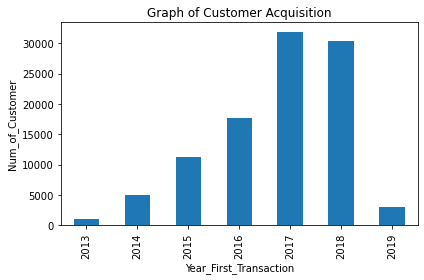

In [12]:
# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

From the customer acquisition graph above, the trend of new customers tends to increase from 2013-2017 and decrease in 2018.

### 2. Transaction by Year

After the customer acquisition trend, the next step is to look at the trend in the number of transactions per year using a bar chart.

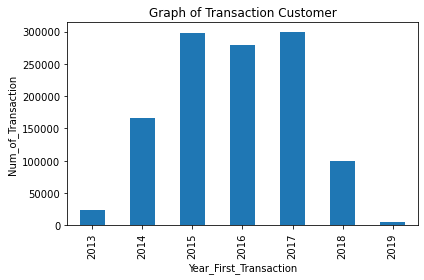

In [13]:
plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

From the graph of the transaction trend, it can be seen that the highest decline in transactions occurred in 2018.

### 3. Average Transaction Amount by Year

Next, look at the trend from year to year on the average number of transactions for each product.

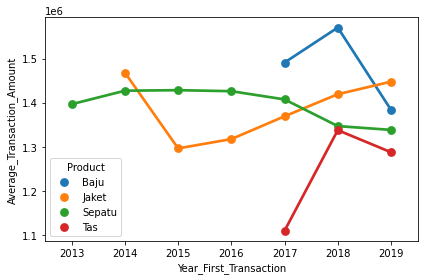

In [15]:
import seaborn as sns

plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.tight_layout()
plt.show()

From the graph above, shoe products decrease from year to year. In 2018 clothing, jackets, and bags products increased, while shoe products decreased.

### 4. Customer Churned Proportion from each Products

In the churned customers, especially to see how big the proportion of churned customers for each product is, insight data can seen with a pie chart. The pie chart visualization for the four products is as follows:

<Figure size 432x288 with 0 Axes>

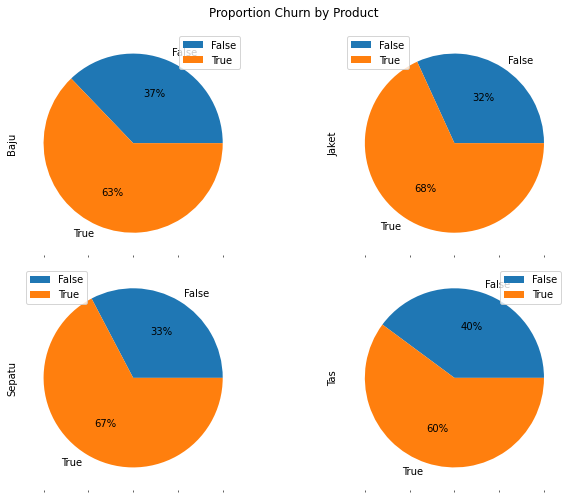

In [18]:
plt.clf()
# Melakukan pivot data dengan pivot_table
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)

# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

From the graph above, the most customer churn is jacket products, and then shoe products, clothing products and last is bag products.

### 5. Distribution of Categorization of count Transaction

The next step is to visualize the distribution of the categorization of count transactions. This categorization is done by grouping the number of transactions as shown in the following table:
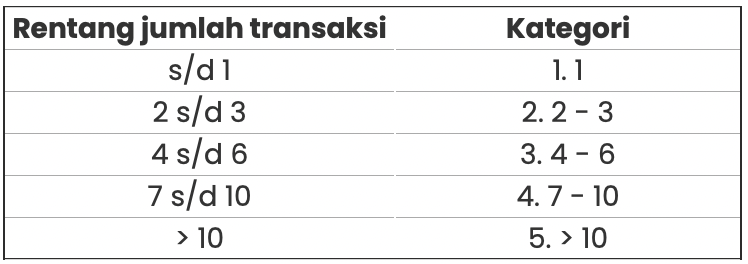

After adding a new field for the category Count_Transaction_Group, the next step is to visualize it with a bar chart.

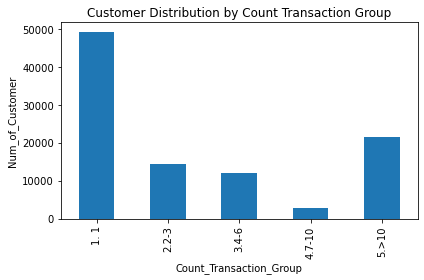

In [17]:
plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2.2-3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3.4-6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='4.7-10'
    else:
        val ='5.>10'
    return val

# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

From the graph above, it can be seen that most customers make transactions only once.

### 6. Distribution of Categorization of Average Transaction Amount

Next, visualize the distribution of the average transaction amount categorization. This categorization by grouping the average transaction size as shown in the following table:
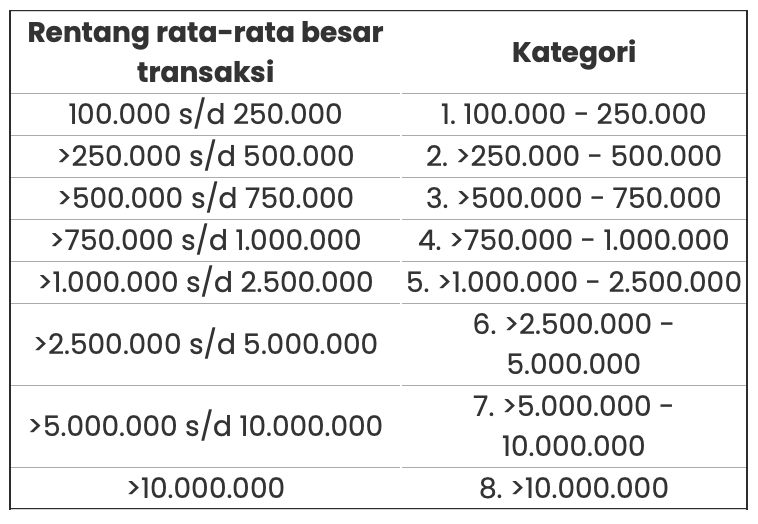

In [20]:
plt.clf()

# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=250000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
        val ='3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
        val ='4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val ='5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val ='6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val ='7. >5.000.000 - 10.000.000'
    else:
        val ='8. >10.000.000'
    return val

# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

<Figure size 432x288 with 0 Axes>

After adding new fields for this category with the name Average_Transaction_Amount_Group, the next step is to visualize it with a bar chart.

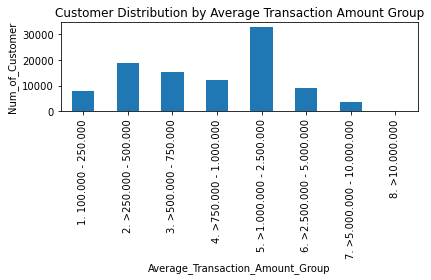

In [21]:
df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

From the graph, it can be concluded that the most transaction is >1,000,000-2,500,000.

## Basic Stat Method (Modelling)

### 1. Feature Columns and Target

In this section, the feature fileds of the dataset will be determined. The Average_Transaction_Amount, Count_Transaction, and Year_Diff fields are selected. However, the last fields do not exist yet. First, we must create the Year_Diff fileds and then assign the dataset with feature fileds as the independent variable X. For the target customer problem with churn conditions or not, assign the dataset for the target to the dependent variable y.

In [35]:
# Feature column: Year_Diff
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns] 

# Target variable
y = df['is_churn']
y = y.astype('int64')

After the independent variable X and the dependent variable y have been completed, the variables X and y will be split into the training and testing sections. The testing portion is 25% of the total data entry.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

### 2. Train, Predict And Evaluate

The next step is to create a model using Logistic Regression. Initialization of the model, fit, and then evaluation of the model using the confusion matrix is ​​carried out.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


### 3. Accuracy, Precision, And Recall

The calculated confusion matrix is visualized using a heatmap from seaborn. Here's a visualization display of the confusion matrix:

<Figure size 432x288 with 0 Axes>

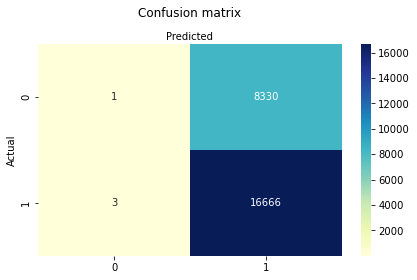

In [40]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

Calculates accuracy, precision, and recall values ​​based on the actual target value and the predicted target value.

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall   : 0.66668


From these results, the model is able to predict the data with an accuracy rate of 67%, with details of the  prediction and the actual churn is 16666, the prediction and the actual not Churn is 1, the prediction is not churn but the actual churn is  3 and the prediction churn but the actual not Churn is 8330.

## Conclusion

1. Based on the results of Churn Customer analysis for each product which is quite high, the right marketing strategy is needed to be able to attract customers. Marketing strategies that can be used to attract customers can be content marketing, social media marketing, search marketing and email marketing.
2. Based on the modeling that has been done using Logistic Regression with an accuracy of 67%, it is necessary to do another modeling with better accuracy so that the prediction is more accurate.